In [1]:
# standard library
import sys,os
sys.path.append(os.getcwd())
sys.path.append(os.path.join(".."))
from pprint import pprint

# data and nlp
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner"])

# visualisation
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 20,10


# LDA tools
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from utils import lda_utils

# warnings
import logging, warnings
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

/home/cds-au606144/cds-language/lang101/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package stopwords to /home/cds-
[nltk_data]     au606144/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("../data/r_wallstreetbets_posts.csv")

In [3]:
data = data[["title","created_utc","score"]].sample(10000) #Running a sample for 10000 out of the 1.1 mio titles

In [4]:
data

,title,created_utc,score
879343,SQ Position. Let's get this 🍞 fam,1572534132,30
889937,Satisfaction Guaranteed?! I'll see you boys on...,1567701712,0
419694,CTRM AND NOK? WHOS IN?,1611853526,1
929230,"Daily Discussion Thread - February 12, 2019",1549969539,1
176196,Robinhood is cancelling limit orders it now ar...,1612202255,1
...,...,...,...
352290,REVIEW BOMB ROBINHOOD,1611897732,1
275248,The real losers!,1611986903,1
928701,It ain't much!,1550177127,1
347249,"Dodgecoin bubble, what will happen?",1611905190,1


In [5]:
nlp.max_length = len(data["title"])
output = []

for title in data["title"]: 
    doc = nlp(title)
    output.append(str(doc))
    print(doc)

SQ Position. Let's get this 🍞 fam
Satisfaction Guaranteed?! I'll see you boys on my Yacht
CTRM AND NOK? WHOS IN?
Daily Discussion Thread - February 12, 2019
Robinhood is cancelling limit orders it now arbitrarily deems "too far away from the market price"
Based on other posts I think I am doing this wrong.
I could see somebody from here doing a Turbo with that.
Long Fortnite!
Undervalued Stock $BAND
Help me get rich you autists
ORBC just made a new 52-week high...
You did it lads! You broke the market at 269.69! 🚀🚀🚀🚀🚀
McNugs
Is this supposed to happen
CALLING ALL APES: I know this sub isn’t political, but NOW is our time to make demands of our politicians! Almost forgot 🚀💎🥜
How to trigger THE SQUEEZE
PLTR is great and all but S-R-A-C is where the majority of where the gains are from. The best is yet to come. Get on bored boys
Slow and heady wins the race.
Fear not. u/vitocorlene has not abandoned us. He was banned by the mods for two days for giving us good news and he will return! Ste

I may have the paperest hands but I made 500 in 2 hrs 🧻🧻🧻
FUBO not restricted by RH and another short squeeze opportunity vvv
I got my first AMC's stocks! Next up is Gamestop!!
Guess this means $XOM and $GUSH are back on the menu ...
DO NOT FUCK WITH US
I’m a cuck for not buying more
We demand porn from WSBgod
When Robinhood's Market Update is a Meme
AOC on Twitch
Was up 25% all time now I am down 20%
STOP HARASSING INNOCENT HEDGE FUND MANAGERS
The onion is doing it right
Which stock is giving you the most FOMO?
Buying GME shares at 100x their value and holding until it drops back down is literally just transferring your money to Wall Street. Congratulations. Now buy puts.
i was on 4chan and i saw people saying to fight with reddit and saying they are better now what
Cruise Companies are dead... Ranked with countries in the world on coronavirus... 🐻 Red wedding starts Monday.. Get your outs while you still can!
Thinking that all the money the millennials are making this week...you shou

LETS SEND DAVEY DAY TRADER TO THE MOON $PENN
Gotta lose money to make money right?😎
Remember this you bunch of magnificent silverbacks! Most people are seeing red today but the important thing is, no matter how many shares you have, they are YOURS! Once you sell them that's it no chance to recover and you have to start over. HOLD! 💎💎🤜🦍🤛💎💎
Down it goes
Manipulation
Its only a loss if you sell. 💎🤚 never sell bois!
my sell price target. sorry for my weak paper hands
Thoughts on $LODE
Why shouldn't I put all *my* money on toothbrushes stocks ?
Cashapp restricting trades!
Freshly minted tendies straight from the HP OfficeJet Pro 9015
How low can it go??
The Stock Biter
Is 450 apple’ next resistance point
Finally entered the stock market
If you guys want reasons to buy puts on FB, watch this movie
Interested in stocks! What should I invest in? :-)
GEVO on a run, no sign of slowing.
SPY puts n calls, volatility is back
BJ's Wholesale Club Earnings
NKO
Attack on Tendies 🚀🚀🚀🚀💎💎✋✋
The only time 

WEBULL ALLOWS BUYING $GME &amp; @AMC
Not loss porn. Foreplay for gainporn!! 💎🤲
Papa Trump has tweeted 🚀🚀
Thoughts on buying $KEG today at open?
This is how you get a 7 day ban folks!
Greets,
Started the year off with my worst play ever
When your portfolio has a higher volatility than your abusive parents' relationship
Financial Times cover this morning, they have good taste
Markets Not Poppin' 🌈🐻
Why the fuck is Nvidia so bad at naming their products.
DON'T GIVE IN!! THIS IS A REVOLUTION
IM LOVING THIS SHIT!
What’s funny/sad is all the pumpers have dumped already
MSFT on that upswing
Don’t stop won’t stop get Doge coin
A New Business Model for GME to Adapt to a Changing Market
Fire sale is almost here boys
GME HOLDER AND MUSICIAN
Long $UBER IPO (or short)
For the culture, I like the stock. $GME
Doge to the moon
Everyone invest cciv to the moon
Picked this up last week after we were approaching all time highs. "No way that lasts through the week with earnings + economic data. Pull back 

THST
91% in 3 days 📈 What do you guys think? Let's keep pushing it. #nextgamestop
GGs time for liftoff
Fellow autists, this mean anything?
That landing pad tho..
Popeyes lending their support!💎👐
Lies!
$AQMS
Buy T FDs today
When Hurricane Florence doesn't destroy you, but $HD does instead
Fuck Wall Street. I found 100$ and I’m fuckin in. Fuck those fucking fucks all the way to Alpha Centauri.
HOLD HOLD HOLD, IT'S SPIKING AGAIN
What beervirus????? STONKS ONLY GO UP $TSLA AND $SPCE TO THE MOOOOOOOOOOON
I conducted a little TA for the newbies here, classic bullish signal passing first nut sack. 🚀🚀🚀
How may people shorted Nintendo stock?
ExxonMobil’s yield is currently 7.11%
Digital currency could allow recycling of coins particularly silver to be used in batteries for electric vehicles and electronics as a nanomaterial conduit #gegadyne in lue of mining for more precious metals in the name of clean air while destroying natural land.
Kodak - I missed out on some profits
First time WSB Post 

Robinhood - "We believe that everyone should have access to the financial markets." $GME, AAL, NOK, BBBY 💎👋
Nikola
Tastyworks is open for GME
When are lyft options available?
the bear community watching futures at 9PM
We made it boiiiisss
My fellow Autists.... I’m back
DON'T BUY OTM CALLS
THEY HATE US CUZ THEY AINT US!!!
Buy the PLTR Dip
SINCE NONE OF YOU ARE GONNA DO IT, I SUPPOSE I WILL - If you want access to that sweet subterranean pool of Tendies there is a deep deep Well called ICE. AND THAT SOB IS ONLY OPEN 930-4.
Options
PREDICTION: What Comes Next
Doge Coin exploded
How much Chinese tendies for Su Babe's AMD EPYC?
Never know where to start explaining
How did we not see this.
🤷
Hey I'm literally retarded and I can't read
NO YOU CAN'T JUST BUY A STOCK!!! SOMEBODY STOP THEM!!
9 Slides Show Bear Market on the Way [APRIL 8th] / Is it finally starting to hit?
What is the current cheapest and best blue chip stonks?
Anyone about to YOLO puts eod tomorrow?
$TRCH is on the run
BUYING GF

Me watching oil go negative, 4/20/20, colorized
Is Robinhood a FRAUD?
ASSEMBLE 💎🙌
Huge Thanks to Actual /WSB Members
If you have a minute, go and rate Robinhood 1 star for clear market manipulation and shady business practices. Among the other things they do like sell your order flow to MM's.
$RKT and $GM next
FASTLY
How can I buy without needing an application approved?
KEEP BUYING
Wall Street needs to be held accountable.
A look at 2020's wildest streaks (i.e. back to back moonings!) + answering the question: If a stock has been going up for N days already, what's the probability that it will keep going up?
#gme isn’t over, people who bought in above $100 are over, the bleeding for suits starts and stays anywhere above $16 ticker.
$NVDA HOD
Gonna YOLO 50% into greens, wish me luck
Trading new COVID variants
Are we actually considering this?
APPY
Jim Bianco talking on a podcast from this weekend about GME squeeze and goes in depth including "Failure to deliver" and chaos that this cou

Post what you’re bagholding. I’ll start.
Sumo Logic Files For IPO of $100M
RYCEY
Who knows, not me, I never lost my diamond hands
Law Offices of Howard G. Smith Announces Class Action Lawsuit Against NQ Mobile Inc.
What LEAPs are you holding?
What were your moves today, September 18, 2017
ATOS has a 93% short interest. Just bought 7 shares 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
BABA undervalued by 25%
Which one of you assholes wrote my Japanese textbook?
How to buy stock in Harry Potter
Unemployment Rocks
If u/WSBgod gives me 1 million to trade with, I will YOLO and give all proceeds to charity. No bamboozle.
Hail r/wallstreetbets
LETS FUCKING GOOOOO 🚀🚀🚀
RIP $BA? United States now joining rest of world in grounding Boeing planes
When's the GME investor meeting for its 5th largest holder?
Burry Political Bullshit
Future WSBer this guys kids gonna be
Stopped trading at 88.88, if you need a sign this is it! WEALTH TO ALL
Battlefront
What do I have to do to help the cause? I’m not familiar on contract bets etc.
💎💎💎D

Too big to fail? Nationalization might be the answer
Trading 212 halted all CFD buy on stocks
My mom just called me and told me to buy Microsoft aka puts in MSFT
IGC
I am from the future AMA
Can someone caption this - sadly I’m not one of those creative autists...
Straight Cash Homie Still Holding
Help me, help you
Some of you wanted proof of my YOLO...
I can't make poor financial decisions.
I want to try options
Bears Celebrating Futures down 2.5%
ZOM
$MSFT guidance.... goodbye tendies
GME earnings call tomorrow
Selling GME!!!
Started trading 3 months ago when the corona virus kicked off, I'll have one tendie please!
New
MASSIVE VULNERABILITY FOR LIMIT ORDERS
How the turntables
Robinhood Farewell
Bullish ON OIL?
Just started options trading last week. I’m fucking hooked boys.
TRIB - Trinity Biotech
HONG KONG LOVE GME!
HMJU, MMED &amp; NUMI ARE THE NEW WAVE (IF WE MAKE IT HAPPEN) Let's make it 420 once again ️ - fire emoji
🌈🌈🐻🐻 wish this broke bear luck bros 🐻🐻🌈🌈
May have lost all the 

Put in that sell order like a true 🧻🤲🏻 at 1 mil
💎🙌
MoviePass (HMNY) to the moon! Their movie hits theaters tomorrow!
Why my stock won't go up? please help.
What are peoples thoughts on algorithmic trading?
Diversification is important, am I doing this right?
Some friendly advice
Held through -$267k loss $AMC. Still holding today and bought 500 options (because RH limits buying shares) 🚀🌘💎✊
The most YOLO portfolio on RH
MrBeast helping to fuel the GME rocket🚀🚀🚀
Total virgin, no experience in investing. Not even sure where to begin. Is it worth the risk getting in now?
Thank god you’re back!!!!
Has anyone been approached by a Crypto Copy?
Who else is betting big on coronavirus, and what are you buying?
ZM 10 baggers and some CRWD 3.5 baggers I’m holding until tomorrow since I already took profit on 2 of the same calls
Anyone else got robinhood ads on reddit?
THE ONE WEAK SPOT ON THE WALLSTREETBEAST IS SILVER.
Alpha four twenty six niner, support load inbound! I’m in! Don’t leave me stran

So what’s the next one to go after??
One of 2 things will be sacrificed here: a few trash hedges or the reputation of the market. Choose wisely, stock exchanges
Tweeter went from 52 to 72 in 2 weeks. Do you think it could go to 100?
$11 yolo?
Buy AMC ?
JNUG/NUGT/Gold Rally is NOT over contrary to popular belief
SHORT CLOUDERA ($CLDR) DD
Made $350 today thanks to $fmci and $opes 🥳 (don’t worry about that dip afterwards fucktards)
BYND Funding Secured
fuck em
Anyone else catch this absolute TSLA cuck doing the floss?
I’m all in at open 🚀
SPY Gains: Just fucking hold your shit or ask RH to enable Diamond Hands Feature
max level strat
REIT winners NSA and JCAP : Self storage REIT NSA has been growing fast while still paying a solid dividend. JCAP has found funding solutions and is trading below book value.
Wich one of u is dis? Nice beamer.
$FIZZ
When will the Feds announce their decision to make or break my future?
Market manipulation. It’s a free world and a free market this right here i

Zoom Gains Porn 330C 9/4 EXP
I like the company
RESI
Life after COVID 19
Anyone up for some silver?
It’s not a loss if you never sell 🤔
GME HOROSCOPE
Barclays wants you to sell your $AMD so they can buy it for less.
DOWN WITH TRADING 212. THEY'LL NEVER STOP US!!! GME TO THE MOOON🚀🚀🚀
TDAmeritrade banning to sell existing GME Options - screenshot
Panasonic Earnings
Rare interview with the elusive Theta Gang
Brrrr feds when the printer jams
Congrats to this guy. 6K shares = 1.7 Million $ invested
Pepsico ideas?
CoinMarketCap showing us some love/support?
OC but probably been done before
am i about to lose my loan + margin money with this earnings play?
What are some scams like DRYS that you have to be an idiot to either long or to not short?
1 share club. Will buy more as i can. Let's fuck these HF cunts with a shit dipped cacti.
robinhood.jpg
Just opened a Robinhood account, how do I become a retard and set sail to the moon?
I’m back! (Stolen from The Trollercoaster on FB and modified fo

That’s my 500 Shares today... are we in the same rocket 🚀🚀🚀 I do believe we can do it again $481,99
Who just dumped their AMD options on me?
Market will be green and then deep red. If you dont screen there can't be new cases reported.
Fuck you Bloomberg why isn't this chart updating
This proves South Park has a realistic depiction of Canadians
Yup
Why do we let Central Bankers Survive?
A true PATRIOT joins the course🚀
Bought 10k shares of SHOP causing the market to crash AMA
GME
[SERIOUS] please help
This seems to be true sadly.
UPWK vs FVRR
GME
This has changed my life forever
$RVP is the next short squeeze. All the syringes for the vaccine coming. And with 80% short interest
This is why the shares are fogging down. It’s part of the game they are playing just hold!!
I made something to cope with my awesome TSLA DD, before knowing it was actually too high...
I have no idea what is happening
As the Fed puts on a song and dance show, don't forget about this
Guidance?
Covid News
Finally m

Waiting for the Zuck to come out as a reptile
Wtf is up with that sudden drop
How to stop buying at the top?
what’s up retards i saw a decent amount of people investing in GNUS what the hell even is that anyway should i it is cheap as a mofo and i am poor anyway yo
Short-Sellers Beware -- Fisker Could Rocket Up 200% 👀
My wife made these cookies for her boyfriend
MOST SHORTED COMPANIES 2021
$RKT Calls Going into Nov. 10th Earnings
is AMC really worth?
To all the gay bears out there, are you happy now?
But This Stonk Can't Sink! She's Made of Hype Sir, I Assure You She Can
Earnings picture please
Short FDX
NOK $5.00 Calls - How Retarded Is This?
Should I hold my $285 call SPY 8/8 or sell now?
Insider selling at meme stocks?
I think we are on the way to the moon, VW short squeeze
STRA
THE PEOPLE!!
Hey guys, I have decided to join you guys after having been on the fence for a while. I know my portfolio ain’t much but finally decided to buy some shares of amc.
ETSY stock outperformed. What 

LETs take a STAND!!! CTRM !!!
WTF Happened to $NAK?
What are the buy limit tomorrow on different platforms???
wallstreetbets getting me girls.
Warren Buffett’s Best Investment Tips for Beginners
"Corona Virus is worse than divorce. You lose half your money and you're still stuck with your wife"
CNBC is using WSB to púmp and dúmp stocks. Fuck off Frank and Carl
Over the hedge F**ck
If they want to play dirty, we don't have to play. #RetailPullout
Does SPY Open Green, Red or Flat tommorow?
I love democracy... unless we're talking about RobinHood of course
FUBO WILL ROCKET. GET IN IF YOU CAN.
It ain’t much, but it is honest work.
HMNY ACTUALLY INDIAN PONZI SCHEME
A HOT STOCK TIP FOR TODAY $$$$$$
I wrote this rap which disses Melvin Capital in honor of GME. I present Yung Quant - GME. WE LIKE THE STOCK!
Thinking of buying EXAS at $82 a share and calling at $110 in APR 18
We're going to the moon buys, get in on $AMSH
RLLCF ?
Does it still count as bag-holding if i'm short a decaying asset? 

Averaging down in my amc position 💎🙌 now holding 35 amc shares, make the hedgies pay
WSBVoteBot Log for Jul 28 2020
CNBC highlights hedge funds shorting KPTI and affecting the availability of their newly approved cancer drugs
New Tesla City...
nice
Order a lot of lube for the week ahead
Cretin reporting for duty. 140 shares of AMC purchased
Here's the next play. This is bulletproof. CNBC 60 minutes pump. INO to be featured on the show. Monday tons of people will buy.
Show me your SQ Love
discord wont send me the verification code
Looking for a Community Member to be a guest for a video-show on YouTube!
Shares v options
"People need to chill out. Take a pill and have a drink. [awkward silence...]. ... not at the same time"
Why is bio pharma tanking?
GME not important. Going prom with QD.
Trader Level Up
BB GME DOGE COIN
Down $10MM and still holding 💎🙌. Bought 750 more shares today.
What Are Your Moves Tomorrow, July 16, 2020
Justin Sun $TRX is standing by us...we should stand by Justin!

dogecoin is slipping. Fast. Have we lost the strength?
Any chess bros out there? HIKARU HAS OUR BACK 💎 🙌 HOLD THE LINE 🙌 💎
$unit
I just watched SNDL take off while many of you autists touted it, and mere minutes later Robinhood delisted it right along with the others. This is unbelievable.
We did it - The battle of the retardation is officially on Friday. Plow your wife one more time, and sharpen those blades. THEY ASKED FOR A FIGHT AND THEY SURE WILL GET ONE! TO VALHALLA🚀🚀🚀
Is 4 digits feasible on gme just curious if it has the capability to hit that high or is it almost at the top
The only decent pick this week
Melvin should go ask his wife’s boyfriend for some tips WSJ News Exclusive | Melvin Capital Lost 53% in January, Hurt by GameStop and Other Bets
Orange Man Concerned Democratic Debates Getting too Much News, Announces New China Tariffs Next Day
Buy 25 $199 SPY Puts at $.45 and Buy 25 $200 SPY Puts at $.68
Two Words: Ford Stonks
Tsla 420
Look... It could totally happen
Stock ma

GME &amp; AMC is stabilizing
Am drunk as fuck. I'm going call 22x $AMD ayyyy ok
When FOMOing goes wrong and you can’t blame on anything but MMs
Investors in breached software firm SolarWinds traded $280 million in stock days before hack was revealed
eToro still allowing trading on GME - Verification process took 15 minutes for me.
BUY AAPL CALLS ASAP
Can someone give me a rundown on PLTR?
$VISL
guys is amc gonna actually rise again
$GME all the way!!!
Joining the ranks....
Diamond hands? So 💎👐
RH seemingly allowing GME stock and options again (desktop)
today is my robinhood birthday. started trading options 1 month ago and thanks to you retards, i knew all the things to not do
If VTIQ gets pumped to 60 I will eat a ass hair sandwich
Thanks to you degenerates I can now pay off my house that I couldn't afford 20K-$400K in 3 Weeks! TLT calls were better to me than slut I have ever picked up! 😂
He was a hedge fund manager, she was 14
If your in GME or AMC you better sell! Timber!!!
Short r

It’s only a matter of time till JPOW obtains Ultra Instinct.
Real or fake?Vanguard ups AMC stocks by 55% link inside.
Make them see 💎🙌 you autists and retards. Flood them with screenshots of lines being held until it trends and they shit blood and retractions on silver shorts covering!
CONTINUING THE RIOT!!! 🚀 🚀 🚀
Best investment app for UK
DOGE to the moon?
RATE ROBIN HOOD 1 STAR
Ok who in here wrote this song? Describes half of you.
Popular or preferred software for tracking stocks?
Ok wtf is going on with MoviePass
Iron Hands
Meme Stock Loss Porn Thread
ASSEMBLE
Just your average europoor retard here. Meme loss porn made me feel better though.
Joining the revolution 🤘
GME - eeerrm should I be worried right now?
Not an advice, I just really like these stonks, my family thinks I'm retarded and they are right.
Stop what you’re doing
BREAKING NEWS...UBER AND LYFT ANNOUNCE MERGER
FUD FUD FUD is all i'm seeing this morning! IDGAF WE ALL WE GOT GME AMC NOK BB!!
F 🚙???
Is GameStop-A part of

Exhibit A: A $MSFT bag holder
It’s all about the fundamentals - thank you Elon, we did this together 🌈🌈🌈
DOGE to $1 today 🖕🏼🚀🚀
Whoever’s selling ur moms a hoe
Melvin and the chipmunks
Bulls still believe monday will be green.
You see that building sport, I bought that building ten years ago, my first real estate deal. Sold it two years later, made an $800,000 profit. Better than sex. That time I thought it was all the money in the world. Now it's a days pay.
PCOAB Chinese stock compliance
BYND - destined to be a blip
What do we buy now?
WHATS HAPPENING TO BLACKBERRY
FUCKING DOGECOIN TO THE FUCKING STRATOSPHERE!!!
Live footage of me (a broke ass grad student) holding onto my 3 shares of GME with all I've got. 🚀🚀🚀💪💪💪
Don’t fight the fed 4/27 SPY $284 Call
My very first options trade, time to get addicted like the rest of you degens
Seasonal allergy.
So general question from a spectator. Did you win? Or is this Citron etc. blowing a smoke screen over the fact that brokers blocked the stoc

Internet's modern day gamblers - the world of WSB [Documentary] [Full video in comments]
You merely adopted the stocks, I was born in them, molded by them. I didn’t see a rational trade until I was already a retard
Will Reality Return with the Reopening?
COVID Vials - Calls on GLW
Get Out Of GameStop Stock While You Can
Apple 200-300 !!
New to trading. Just winging it.
Rate my positions, why am I a retard?
Screw it, I'm out
I just want to say thank you for your service
Amateur market analyst here. Name a company and I'll give my thoughts on whether it's a good investment or not
"I've seen a security hologram... Of him... Killing the hedge funds..."
AMD tomorrow, thoughts?
I have 600k what should I do?
Aurora Cannabis CEO Terry Booth is stepping down and company plans layoffs, sources say
May someone please tell me what is the current short positions/interest of GME? If you have source please add. thanks
It literally can’t go tits up.
ArcticDelightfulDairycow-max-1mb
😤🤮🥵 Do I hold on? O

Not even IB will allows buys; talk about rigged, they're all in on it.
AMC for me
Hedge funds when this is over
WSB finally convinced bull market is over
Let's do some WINNING
None of you dipshits benefited from my free tip yesterday so let's see how easy I can make it for you
Feb 01, 2021 | Today's Top 25 WSB Tickers
Time to sell these bois? Thanks daddy Elon
Fuck you and your $75 transfer fee, Robinhood.
Is it safe to say if anyone other than trump gets elected the US markets will tank? Especially if it’s Bernie?
MTN Calls
Small Weeb joins the Fight
Went all in on $SPY puts few days ago
[WARNING] Next bull trap happening RN. Dont fall for it.
NOK is about to take off 😎🚀
Me Today
Fuck this guy. Hyping us up and saying he holding till 0 and then folding first sign of trouble.
NICE 👌
$GME GANG
Good job Rebel scum!
How will NTNX perform?
Andrew Left Accuses Elon Musk of Stock Market Manipulation - 2018 (Colorized)
ROKU took a BEATING. Time to load up on ridiculous OTM calls to bring this

What next
Fastest Platform Currently Allowing the Buying of GME
$CGC.TO up another 10%
Bitcoin flash crashes to $101 (5/31/2019)
Stock Market News for Today | PLTR / GM / AAPL / TSLA / FB / MSFT &amp; Other Stock Market News [01-25]
The second move tomorrow will be the one to press
How tf I short sell from the U.K.?
I closed my inverse fscomeau trades
Dang okay
&amp; SPEND ANOTHER QUATER! 💎🙌
Discussion board please never change
Some tax free gains
Is that desert lizard Sheldon Adelson propping LVS up?
mrw the stock market crashes but I didn't make any bets on Brexit
Is DOGE worth it?
How many of you talked about the crashing market over Thanksgiving dinner?
Where’d the volatility go?
Agriculture Plays on Coronavirus
Is anyone here autistic enough
Tell me how to YOLO Amazon earning
Sell Jan SPY 195 puts?
It’s official.... 6 more weeks of... HOLD!!!!!
AMD to WEED.to ratio
80 million Chinese may already be out of work. 9 million more will soon be competing for jobs, too
What's your favori

This is fucked!!! Money returned. Stocks still in portfolio. Can’t sell. HELPPPPPPP
We have gained like millions of subscribers the past couple days and not been featured here at all kinda wack
Wall Street Journal is a lying piece of Dog Shit
SBF of FTX is behind SOLANA and SERUM: a blockchain and decentralized trading platform. Use this instead of centralized exchanges!
Can we get NOK to 15
I'm creating a peer-to-peer application to sync the posts and comments on WSB and let people post/comments in p2p in case they try to pressure to shut down WSB. Let's make that community IMMORTAL!!
HYLN Play
The late apes can get in on the action too!
$CSCO EARNINGS THREAD
I need actual advice.
CANT STOP WONT STOP
playing TSLA earnings with Iron Butterflies: retarded or autistic?
Webull
Dogecoin is going to the moon
In response to Robinhood’s most recent email. HOLD 💎🙌🚀
Confession
IG UK/AUS BROKER RESTRICTIONS. Not allowed to buy GME or AMC. Also no new accounts can be created!!! This is a joke. IG

Don't give up now.
I'll hold my gold until I'm told $JNUG
GNC didn't give me gains in the gym as but it can as a WallStreet Bet'r. Especially now as a CH 11 co.
BAC+B
Worthington Industries, Inc. Being investigated for insider trading, for there deal with nikola?? What do you all think???
So. Just 20 shares gme snd 129 shares amc . My prehensile diamond hands are holding super tight. Not sure when I know the time to sell. When squeeze happens. Is it quick? Do I need to set something? Climb the side of a building? Swat a helicopter ? Plz help!
BHC To The Moon
DO NOT PANIC
Come sit on uncles lap story time...
Tricked, swindled, and quite possibly bamboozled
ONE OF US! ONE OF US!
YOLO: hindsight is so last year
SNDL
GME DOWN ,KEEP HOLDING RETARDS
Robinhood is shitting bricks now
CRMD
WEBULL allowing all trades again - update in TOS from BZ
Trading platform
'China's Nasdaq' has started trading and is off to a great start - Tech Leak
My first fund ever received on the app that shall not be 

Is this a glitch or are option gainz really this dank?
Should I buy Inovio?
Ayyemmdee full speed to the moon
BBY 2020 earnings report from Robin Hood
I just spent my paycheck on one more $GME stocks because I saw a picture of someone’s dog and it made me love $GME even more.
WSB has occupied wallstreet way better than we ever did in ‘11
FNMA &amp; FMCKL
Great education
Why use Bloomberg when you have HuffPost?
IF U CANT BUY GME SWITCH TO NOK!!! LETS GOO
RLYP Misses Q4 ER - worth buying in?
What Are Our Chances?
A message to all scrubs, retards, and husband-in-law havers
Buy and Hold $GME but the endgame no one is talking about.
IF YOU’RE IN THE UK, FREETRADE PLUS STILL LETS YOU BUY GME.
etrade troubles?
12x the TENDIES in TWO DAYS
ELI5: how can a broker allow the borrowing of more shares of the stock than actually exist?
🥜🚀💎✋The Big Squeeze Song 🥜🚀💎✋
$AMC
SOLAR and CLEAN ENERGY ETFS
Just bought BB, HOLD people. support from Asia.
Yes Melvin Capital Lost More Than 50% This Month, But Re

Why do you think GME has not squoze yet? Don’t get me wrong, holding 100 shares strong and profited on calls. But this looks like a squeeze chart... They very well could’ve covered short positions on the run-up and the new short positions they did place are in the green. Don’t say Volkswagen
GME, why?
Cheap $ROKU earnings play. Unless of course it goes above $45... but that won’t happen that’s just silly.
HOLD.
yall should try and get doge coin up to a dollar 🤣
BUY FUELCELL ENERGY INC!
Fed to bailout the economy with trillions of unconstitutional illegal monetary financing.
Imagine If......
I'm buying calls on $BDSM
JUST BUY THE DIP!
Bcrx
amc next&gt;&gt;&gt;?????!!!!
Keep calm and buy and hold
It ain't much. But it's honest work...
SOMEONE EXPLAIN THIS BS RN WTF JUST HAPPENED
SNDL
🚀🚀🚀 VOYAGER DIGITAL vs PAYPAL 🚀🚀🚀
AMC TO THE MOON
Best British cinema stocks to long?
Is GME just going to drop now??
YOU'RE GOING DOWN MELVIN, WE'RE GOING UP 🚀🚀🚀
GG DD Witching Bulls. 28k bet on Spy Puts Fr

Everyone’s got Jan calls for $MU. Did I fuck up? Should I hold on for tendies or bail. This is my moment of need, plz autist wizards. I’m YOLO’d for 60% of my portfolio.
Standard /r/investing financial expert giving advice
Well I visited the mecca today about 36 hours before zero hour to pay my respects. I stood at GME HQ in Grapevine, Texas, the effective ground zero for this financial revolution. I don't have much skin in the game compared to a lot of y'all, but I'm just proud to be a part of this. 💎🤲🦧🚀🚀🌚🌚
Lol at spce put gains
Well after trading resumed, RH diamond hands feature was activated...
1300% in a week
Whole stimmy going into gme. CUZ I LIKE THE STONKS
If I can hold and you can hold, we all can hold!
qd
Made a meme for you guys, WSB vs. Melvin Capital the battle for GameStop
Rising From Ashes: The Journey Of Delcath’s Stunning Return
Short Japan and Hilton Hotels for the WIN
DON’T FUCKING SELL. DO Y’ALL SEE THESE TWO CHARTS. FRIDAY AND TODAY. 💎🙌 🚀🚀🚀
$BRK.B just grew 67% thi

Convention in Denver to decide our new home - Part Two
I DEVELOPED A AUTISTIC APP TO SEND US TO MOONNN 🚀🚀🚀🚀🚀🚀🚀🚀🦍🦍🦍🦍
Is this the top?
Sony will moon (Double Dick inside)
“It’s just money” “At least you have your health”
why did WDAY drop even though they beat estimates?
Biotech takeover? Shorts indicate this
How to Beat the GME Short War? Diamond Hands...sorta.
Robinhood buying power just disappeared
Who want to be rich?? 🤪🤪🤪
Fuck you too TSLA
XLU, SBUX, SNE, MSFT, QQQ - 1SD Credit Spreads 05/02/2016
Today’s PUT play for tomorrow
CRISPR Concerns turn out to be a big nothing
What's the next stock?
ACB Consensus
haha reddit go brrrr
Avalanches and Brokers
"Ford falls on downgrade"
Review of the AMD 480 is out early. Plan your $AMD accordingly
NFLX in a good place to buy in?
Bellerophon Therapeutics (BLPH) iNOpulse Technology
American Manganese +25% on Bloomberg mention. They recycle EV batteries for lithium and colbalt
[Discussion] What Were Your Moves Today, August 02
BEARS REJOICE! 66% 

Robinhood is scum of the earth
Mod 1R0NYMAN. He is our Minus Ultra
Silver miners are small - WSB can run them up
Found recommended reading for r/1r0nyman?
Who else on the $BNGO rocket ship?
The Network is Rallying In Support of Crypto Traders
Boomers support WSB on GME
question: why are my TD prices always different/lower than all my other brokers? (RH, Fidelity, etc)
How much does seeing level 2 quotes help your trading ability?
MU Earnings Presentation. No Guidance included.
Going Up Again!
Buying the dip
For all my fellow retards out there still holding GME.. is this Jim Cramer or Donye Wump?🤣🤣🤣
Unite
Stick it to them
IGNORE ANY DIPS REPEAT IGNORE ANY DIPS
Good enough for me. Loading up on NIO calls 🚀🚀🚀🚀
How to: Bull trap
Small losses for a BIG retard💪😤 But hey, It's only a loss if you sell, right?! - Joined too late to get in on GME. Probably holding til the bitter end cause I'm not ready to admit defeat.
SPX Reverse calendar spread? Free money? [serious]
WSBVoteBot log for May 02 

Wife of NYSE chairman appointed to White House "reopening" task force
Red is Rose. Bloody down it goes.
Facebook trying to sell me cocaine utensils. Long $FB
Hey fuckers, I'm programming an automatic profit/loss diagram tool. Try it out. (MSTX shareholders only, please)
[Serious] What are all the possible justifications for stance that oil could bottom lower?
UPDATE: Fed can't afford their heating bill.....BBBBrrrrrrrrr
It's a sign
Facebook to 1 Trillion!
Volatility Calls? $VXX
For those still stuck on Robinhood, they’re currently allowing you to purchase up to 100 shares of GME. Buy the dip! 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
guh
Stupid trade war news... Nflx you rotten bastard
Just a reminder to keep giving Robinhood negative reviews!!!
i was so baked i bought 11 shares of SPX instead of SPY. Up 82% this year haha
Robinhood is letting people own up to 20 shares now.
I’ve made $3 on options so far. When does autism kick in and I lose hundreds of thousands?
$BIIB success thread perhaps?
Sold 4h before QC

Lulu Earnings! What To Expect Out Of The Retail Sector Tomorrow and How To Trade It
Why isn’t GAYMF on the mf moon yet
Can $GOGO still gogo or has it $GONEGONE
ALMOST 6 MILLION ASTRONAUTS GETTING READY FOR TAKE OFF 🚀 WE GOING TO THE MOON 🚀 🌚
Our savior Queen Yellen
Are the bears here in some weird financial suicide cult?
r/TryingToScalpIPOs
Choose wisely
Battle between retail and hedge funds (2021 colorized)
Options
Am I doing it right?
GME below $100
20 QUESTIONS TO DETERMINE IF YOU TOO ARE A DEGENERATE GAMBLER
Double down ape brethren
Time To Short TKMR$? Unproven Ebola drug &amp; thin put volume
Where to YOLO my savings?
WSB is better and riskier than hood-life.
Robinhood is giving me warnings about margin maintenance? How can I make them go away?
u/deepfuckingvalue will be the first redditor to testify before congress #whatajoke
Next
A twitter thread on Gabe Plotkin
Oil war plays DD
What's stocks should I buy right now I have 500$ Canadian(HELP)
"It’s hard to see PLTR stock surging

Problemo Solved 😌😌😌 Accidentally had it as red 🤡
In on $F
Can you even come back from this? Any advice
The Trump Stimulus will fail, small businesses will go under before the money gets to them.
In light of the newly infused capital, what strategic business changes would you make if you were the GameStop CEO &amp; Board ?
They’re tracking us.
Blue wave = Mary Jane bringing home the tendies
Maybe hopefully give some people comfort to hold!!!!!
We can’t possibly have a full green week, right?
I am proud of everyone here! But I am soo proud of myself for buying my first ever stock! I'm holding on for dear life!! ✋💎✋💎
Put on your helmets, fellow retards! 0DTE options enabled
ETF Idea - Rocketship Index
GME TA for 1/28/21
EXCUSE ME. WTF!?
Positions on SDC and putting my money where my mouth is...literally. I’m not a hot shot like most of you. Just a regular guy who is taking a shot in the dark. Why SDC has not made it on RobinHoods 100 most trades list is beyond me but just remember...I pos

The Last Stand of the Diamond Hands, GME TO MOON
Im getting ass raped by this market crash
should I buy shares of a company whose price goes up in a particular month?
People on this sub be like
I taught myself to draw just so I could make this in group &amp; show it off to you dudes. 🔹 👐
Don’t you fuck this up, REGN-COV2.
SGBX!!!
Monkey needs bananas for the moon 🚀🚀🚀
[AMA] I was just made a moderator of r/Wall StreetBets then removed afterwards in under 1 hour.
Short Volume Ratio of GME and AMC has been diluted by all the Buys - HOLD! 🚀
“Willing to Lose” to “All In” 🚀
Rite Aid LEAPS
How are things looking for tomorrow?
SQ Earnings Thread
This Is Why I’m a Bear CHAD TLDR: SPY 300c 5/8
I'll be honest as a brit I'd given up on america the last year or so but what you've done to these billionaires is inspiring they done me over in 2008 I only just recovered to then loose everything again , I wish I could join in and buy shares to help the cause but all I can offer is my admiration
Just one

How To Avoid A FOMO Buy In 10 Steps
They see new holdin', they hatin'
FREJP up to $18
I don’t think I will ever forget this. I am chopping my balls of cause I don’t deserve them
BREAKING NEWS: Donald Trump makes tremendous and historic recovery
WINDMILL 🇳🇱 IS JOINING THE 🐵 ARMY. 💎💎💎🙌
This is what censorship looks like and it couldn't be more obvious.
Explanation of why Robinhood really restricted buys of GameStop
Bloomberg Lies
#ALERT #PENNYSTOCKS #PENNYSTOCK #STOCKMARKET #STOCKS BUY TICKER #ABIO MEETING IN 1 DAY THIS WILL GO FROM .53 CENTS TO $5.00 TARGET PRICE RAISED
Hi, I would like to know what is your opinion about Cardano (ADA), please start de discussion!
The obvious reason Tesla isn't going private anytime soon
NICE😏NICE😏NICE
How can This be legal, they are not allowing people to buy certain stocks and a free market you’re allowed to sell but you cannot buy. It’s only benefits to hedge funds. I say we start a class action lawsuit.
$DOGE to the moon 🚀🚀🚀
IN MY BLOOD - Short squee

VALE - Things looking up
GME Bagholders Got Played
Tesla over $800/share in the next year??
For europeans, On which platform can i Buy AMC please ?
Combined faces of two billionaires. Guess who they are.
YOOO AOC
What is a call?
CHAMATH HYPE JOINING THE $GME GANG! LET'S FKING GOOOOOOOOOOO!!!
Retards and their inability to take profits
Let's model things as WSB vs HF in a zero sum game.
They will break their own system just to make sure we don’t get paid
SOMETIMES THE SITUATION CALLS FOR YOU TO GO APE OOOOHH OOOHH AHHHH AHHHH 🦍🦍🦍🦍🦍🦍🦍💎💎💎💎🖕🏼🖕🏼🖕🏼🖕🏼🍌🍌🍌🍌
Advice: GME is over, why you should invest in Weed stocks
Diamond hands boys 💎👐🏽
OZON Russia’s Amazon or NA
Who else is playing Closing Time by Semisonic!
Thank you Daddy Musk
Trading 212 won’t let me buy gme and nok shares it will only let me short them
What is your 1-year rate of return?
It’s a pharmaceutical so be prepared to pull out. Bitcoin is about to die, ETH will stay steady.... look at BILZF and ERBB, penny stocks but one is Dan bi

Trump bucks save the day.
Overstock Calls?
FISERV
Robinhood tryin to avoid this smoke
Where are all the posts?
Why I’m bearish now - play both sides (reminds me of your gf)
Happy cake day to the WallStreetBets subreddit!!! 🎂🚀🎂🚀🎂
This wood stays hard for 50 years. Stocks only go up
HODLing STON
I would like to present my Opko Haiku for your reading pleasure
Theory about the new mascot
BB Coordinated push (half an hour before market close)
Amazon drivers will be warlords when they shutdown everything.
I pulled the short volume data reported by FINRA and graphed it for those of you who know what this data means. I can't do math, but let me know if this confirms or debunks S3 claims on twitter.
Just came to drink some beer and hold some stonks! Looks like we're almost outta beer!
Karen Musk says all in TSLA!
TENDIES NOW
Someone explain to smooth brain pls
When do I sell my $7 snap puts
WHATS THE NEW WSB DISCORD??
Dogecoin, lesssgo
Sold phone for spy puts. Now my account is displayed on my 

Hallo Kak saya Gisella dari PinguLive, mau menawarkan PROMO NEW MEMBER, BONUS REFERRAL 5% &amp; Bonus harian untuk info lebih jelas bisa ke livechat kami di website www.botolbir.net atau via Whatsapp : +6287796634774 dan jangan lupa Like n Share Facebook Page kami ya @pingulivee &amp; SUBSCRIBE YOUTUBE PING
For those who care, here are the upcoming earnings releases for the week of 11/2-11/6
Young people are playing the stock market in a coronavirus-driven gold rush (GET THE FUCK OUT NOW!)
Guys, We made it.
I forgot how to paint, too focused on 💎🙌
XLM steller Lumin
I got fucked on bb due to the block.
21 Year Old Highschool Dropout and I'm DIAMOND HANDING TILL THE END!!
Get your SPY $100 puts in now
What does WSB think about SunRun inc. ($RUN)
We need breakers for market go up
Me watching my $SNAP puts today
Possible risk for GME and the short squeeze
Looking for recent Econ grads
Gamma Squeezes are neutral &amp; GME can still squeeze back up.
Missed By $.06 Today BOYS! (TESLA Stock Cl

How are you dumbasses becoming millionaires?
Who is still holding BB &amp; NOK
GME-I didn't believe in the closing of short positions and neither does this guy!
I lost my job at fedex this week.
Wallstreetbets autists in one pictures
When the moon comes out from a lucky PR
SILVER SQUEEZE BEGINS! SHORT $SLV $AG
I want to burn $25,000
what do I buy tomorrow? I am new to WallStreetBets
Am I doing this right?
HF trying to distract?
Alternatives to Robinhood?
Trade War 2018 (colorized)
Ways to profit off the sports betting ban
I'm one of those 4.3M that just joined this sub who know little to nothing about stocks and too broke to join in but I have to say that I love this community already. Keep up the shenanigans. Y'all have sincerely brightened a stressful time for me. Alrighty, back to Warzone I go.
Hi, im new here and proud of what y'all have accomplished. I dont know much about stocks and or the market but would any of you please share some tips, information/resources and which app sho

16 year old faggot here
Alberta pension manager loses $4-billion on investment bet gone wrong
Pull out the ole Green Day album and celebrate because we are GREEN!!!! Bring in the gains.
Must be on spectrum to enter
Investing advice from the Valley
How long can hedge funds wait?
Me on r/wallstreetbets
I BAILED. GET ME BACK IN THE RACE.
XIV trader who lost $4M... Any insights into his strategy?
X-Site Energy Services
Investing vs WSB
Buy amc let's go
$BOXL next ?
What should I YOLO my last $400 on ?!
Lurker turned Autist
Is GME going beyond 400?
Shoving my $3k college savings into Apple on Monday.... wish me luck.
More failed cell phone stock.... HTC?
Look at NVIDIA’s 52 week high
HOLD THE LINE BOYS HOLD AND BUY! BLACKBERRY TO THE MOON 🚀🚀🚀🚀🚀 WE LIKE THE STOCK! DIAMOND HANDS 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
Why the Fuck is $AMC falling?
E-Trade has halted trading on GME -- where can I still buy GME?
Had a manic episode last night triggered by the hedgehog psychop. Stayed up all night still not tired, talk to

🌈🐻 RISE UP: DIS $115 3/20
Hope is never gone
Look at this classism.
MSFT tendie eaters, what now?
Hot New Buys
MVIS could be in gen3 MSFT hololens
I have a little disposable income and get paid tomorrow...and I can still buy NOK and AMC on CashApp...should I buy more?
Can’t wait to trade in all my games for 10$
What will be ticker symbol for Lucid Motors CCIV merged entity??
Thinking about holding these USO 3/13 6.5 puts over night
Super Bowl
MCS Theaters Reopen Tomorrow
What’s up!
KTOS to the moon
Bloomberg terminal GME, WSB HOLD!!
Petition to erect a monument of WSB in Wall Street
WE ARE OPENING RED TOMORROW BOYS
DON'T LET THEM WIN
Wallstreetbets goes to the primaries
Did you ever hear the tragedy of u/DeepFuckingValue The Wise?
Push
Washington probably has a couple thousand cases
Stash is down, TOO!!! Can’t log in to app.
What is the next brokerage we should use?
Stock price of gamestop
Shanghai Disneyland resumes some resort ops as coronavirus infections slow
Got what I deserve for

Granny smith kinda day
TD not letting slv be bought
VXRT - next squeeze
Diamond hands forever!!!!💎🙌🏻💎🙌🏻💎🙌🏻
Always Rebounds! $BRZU
PSA to all my fellow bears.
Big think
Still holding!!! Please buy and hold and main these losses into gains!!!!🚀🚀🚀
If nobody is able to buy GME how will a squeeze work?
Someone just shorted NOK with 5,000,000 shares at $6.94, Screw him let's squeeze NOK. Hold GME, Hold BB, Hold NOK, Hold all the stocks that WSB have.
WSB pump-and-dump diamond hand monkeys are the male equivalent of MLM essential oil ponzi scheme chicks on facebook
[DD] Beth Bath &amp; Beyond $BBBY is in deep trouble
Long but interesting write up on GME, some thoughts on what happened this week and how things could pan out. Worth a read (also 🚀🚀🚀)﻿
Make Robinhood Pay!
Hold the stonks🤑🚀
Chinese Money Pours Into Hong Kong as It Becomes a Stock Gambling Paradise
Leave this sub!!!
Can I just create a small business and get free JPow money?
CMG
BB, Silver Majestic &amp; AMC
Exactly what I wanted t

One day... when my robinhood penny stock hits $15
RH took SNDL off their No-No list. Hmm....
Global Stocks Struggle for Direction as Regulators Discuss Market Volatility — Barron's they forgot the part where she was paid Lul Thanks Janet
FTW you autists
Alright fuck it selling my crypto to buy GME at the top for the cause!!! I’ve decided to sell my ETH to Support the cause I’ve put $1500 in and will put another $1500 once Ive mustered the courage TO VALHALLA BROTHERS!!!!
Take off!
$AAXN Earnings: $0.18 actual vs. $0.04 expected
Is AMD run by a bunch of autists?
Black berry
talk to me about APXT like i’m lobotomized
Well done WSB! It's about time the ordinary guys had a win and exposed the establishment for the sore losers they are.
10K day traders an hour are buying TSLA stock
Long Bombardier ($BBD-B.TO, $BDRBF)
DIS (Disney) earnings thread - today after the bell
We shall be autistic! Melvin can shack up with my wifes boyfriend “Jeanne”!
Holding like it’s my destiny. 💎💎🤲
Holding $SPY a

$ALLY (literally no reason this should be taken down)
Why are higher strike price calls costing more?
Well ain't that a thing?
We’re infamous!
Tesla's Model 3 accounted for 29% of all vehicles purchased in Norway in March
$GUSH
Congrats Bears - Governor Cuomo to sign Executive Order on Sunday 3/22
To those trying to post about other stocks and are getting berated by these GME weirdos its okay. Theres allot of new people here that don't know about stocks and are trying to gatekeep people to invest in the one thing they put money into. AMC has gone from 2$ a share to 18$ in a week :) LETS GOO!!
Doge to the moon!
bULLS After This Week
TRCH
Update on Scorpio Tanker ($STNG) play
🚀🚀🚀 $BB is assembling quite a gang. Amzn now Baidu 🚀🚀🚀
Did you know the Federal Reserve has an active customer service line?
Light speed trading (brokerage)
How sleeping with the wife of an Executive Director almost got me a job at JP Morgan.
Ethical and Legal Issues
Ahhhh. I get it now...
Don't need a title
Vaccine

Can WallStreetBets become the hedge fund to destroy all hedge funds? VERY HYPOTHETICAL POST!
Anyone here into Merger Arbitrage?
Oil holders - "What in tarnation??"
Nok guys lets push it up
Robinhood Sucks
"No asthma found in one third of adults who were diagnosed within the past 5 years, according to JAMA study" Who do we short?
Earnings all week and you autistic fuckknuckles are spamming posts about JPow
CIIC up 30 % today, retards!!! Who else getting a hard-on?
Today my car broke down and won't jump, I lost my phone so I can't call for help, and I'm locked out of my robinhood account without sms code authentication
We can’t let them take down something that is actually uniting people. These large hedge fund boomers have been manipulating the market for years now with shady tactics. All we are doing is buying something’s believe in! Love you all
$AMD will fall to $29 today.
Plane Fly's over RobinHood HQ in San Francisco
Germany stay with u!
Trump is a genius, how did he figure this ou

Fuck Wall Street we running all way up gme,bb,amc,nok
Broke boi’s first tendies
BBY Earnings Run-up Play
Robinhood no longer supports the trading of GME
Okay this could be a classic stupid n00b question but stay with me here... how many short ladder attacks can they feasibly do? Should we be prepared to see this for days to come?
Does anyone here have a person/source they enjoy that talks about stocks?
I my 25+ years online, I have never....
One big fat ugly stockmarket bubble pricked
Oils about to rocket
Still holding. This is the way.
I find it hard to believe that not one of you retards got in on GLSI
I look away for 2 minutes
Gun stocks for the riots? Looking at Swbi maybe hold for a week?
Can we make a WSB brokerage?
Retard Napkin Math
What is the future of WSB?
catched amd knife on friday, What to do know?
🚨🚨🚨SHORT SQUEEZE IS ON!!!! 🌈🐻 Better sell your puts now. Today and tomorrow will be BRIGHT FUCKING GREEN
SPCE EARNINGS
Year of the Tesla Bull confirmed.
First time investing, m

SPCE - Short interest at 81.5%?
How I'm hedging extra for guac going up. The notification was a sign from a above
CONSPIRACY:Russia might be hiding endless gold reserves
Buy buy buy🚀🚀🚀🚀money
I prefer tendies over turkey
$AMD is releasing new Ryzen CPUs that run ice cold compared to Intel, Cramer and Su Bae gonna pump stonk tomorrow, $AMD to $35 by next week
Will TESLA continue to rise to ATH till Dec 14th?
Weak paper hand mfs selling off. 💎🤲🏽 BUY THE DIP NOW RETARDS!
5k yolo in puts. 4k Tesla 1k tqqq. I love you Elon but sexually now 🌈 🐻
Holding out for that bear market...
HITI.V | HITI or miss?
Bloomberg BusinessWeek - Week Of 02/29/20. You did it again!
23 bagger on HTZ
LMAO MY SIDES 🤣😂🤣
OK RETARDS! I fucking did it. Dont let me down.
Is weed stocks a sell now?
Collective target bank runs - would it be possible?
$AG $SLV
Hedges are repositioning around next January. If we don't completely kill them now, we can just do this again next year! We are going on a rocket burn out of the fuc

The last three days summed up
Just wanted to say thanks...
It’s not about the money, it’s about sending a message.
Twitter is kicking off already! KODAK is fucked lol and mr Orange menace also going to get heat over this!!😂😂😂😂😂 let's add more puts! TRUMP already denying he was a part of the deal🤣🤣🤣⬇️⬇️⬇️
Robinhood cancelled my GME limits for being "too far away from the market price." A free market means the seller can ask at any price. Thankfully Fidelity is on our side and I'm in a new account with them in less than 30 minutes with buying power! I GUESS RH secretly wants us to HOLD 🚀
Too late to sell baba?
Volatility Standouts 4/19
Newbie
Want to become one of us
Natural Gas Thread 4/5/17
My Snap puts want to know why? I don't see any news or anything.
What your Catalyst events are going to be.
New GME Goals
Bought puts just before close. Like a bitch I only bought 10.
Only for USA, UK, Canada, Germany, Australia 200$ Amazon gift card. Hope you can win don't miss the chance. Just sub

Castor Maritime Inc. headed to the moon. Here's the DD 🚀
SCROLL DOWN TO THE BOTTOM OF THE PAGE
How can I deepthroat $BECKY this week?
For all the retards that think WSB moves markets, here is a real market mover
$CLSN is the best YOLO this week
Falling knives don't cut diamond hands.
Buying tbill and bonds
The system will not be able to win us
Damn Amazon who hurt you? 😶 Was it Newsom? 🤫
Shame on you KODAK -$KODK [Fraud Alert]
Fuuuuuuuuuuuuuuuuck You. Lying smug bastards.
Let’s bring the 🚀🚀🚀 to the Moon! We already deserved these badge! HOLD ON 🔥
I’M ON THE ROCKET HOSS
BA is a massive dumpster fire. You should YOLO puts! (Or should you?)
Etoro wont let me buy stocks either
Investing for a Tesla
Guys stop throwing away your money. Research and read up on AcuityAds Holdings. AT.TO(TSX) and invest according to your findings. Going to nasdaq in a month
Huh 🤔💎
Oil,Oil,Oil
$STMP 4Q REV. $132.5M, EST. $118.8M
Anyone else catch the YOLOer that filled one $.36 buy order for $SUNEQ at 10:47am ES

Nio🚀🚀 GME🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 AMC🚀🚀🚀🚀
One of us now
Will investors move from Wall Street to Bitcoin?
The reason selling your GME share is idiotic.
Yesterday I hit peak autism
My order for amc in RH went thru
How’s my chart looking?
Does anyone have a working link for the CNBC full interview with Chamath?
Thank you WSB.
bought my 2nd share during the dip :) its all i can afford but im glad to be here!
I’m doing my part! Haven’t got a Game Informer in years honestly pretty stoked. Can’t wait to be reading it from my yacht after we take GME to the edge of the universe 🚀🚀🚀🚀🚀🚀 price target $42,069. Fuk the bears I’M NOT SELLING
Understand the wash-sale rule
My portfolio...I want to grow and be involved...please help. Thanks ☺️
Third wave of EV is coming in about a week (NIO, XPEV, LI)
Current state of WSB..
SPY 12k gain
Flown Over Robinhood HQ
Uhh what do it mean
AMC TO THE MOON 📈📈
Waking up checking what EU did with GME
AeroGardens
If these fucking hedge funds get bailed out on my tax dol

Ben Shapiro’s great explanation of the situation.
Vix up to 23
$RNVA is on the rise
Anyone actually try using stellar
How bad is this
EFW Proprietary Info
Melvin Capital this week when they get ripped a new asshole by GME mooning 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
$SPCE and the $30 mark
Waking up to good morning texts from bae ❤️
Anybody else? Since 12:00 ET - ON OPTIONS DAY... ughhh
WHAT APP CAN I DOWNLOAD RIGHT NOW TO BUY MORE GME AMC AND BB?!?!
Here is my second cheat sheet for you guys, since you liked the first one so much. It is an analogy about how stocks relate to women.
Wild Cub wants opinions on Marijuana Stocks
God damn it API you petroleum cucks.
Just a reminder that QD is going to the moon 🚀
Netflix Gains
69 blaze it!
Easy Short-term SPAC play on G.HIV 🚀
NVDA Liftoff
AMC and CGX
Shout-out to George Sherman, the current CEO of Gamestop.
Get the DOW up!
How I look at my robin hood from a month ago to now. Fucking 🌈🐻
Any reasoning for this spike? It’s normally one of my many negative tickers
Give me

Hello bois. The girls are here with you, and we like the motherfucking stock. To the moon 💎💎💎💅🏼💅🏼💅🏼
CRMD .... Any thoughts...
Shouldn’t somebody go to jail for this Martha Stewart went to jail for less somebody stop trading on multiple stocks to purposely manipulate the price out in the open that’s so illegal
"Be greedy when others are fearful."
Let me know when you see it... Brady knows 🚀
Do you kids still blame tariffs for your shitty portfolio or did that stop??
BEWARE WALLSTREETBETS A NEW MEME STOCK IS COMING
So I want to bang a girl, but I also want to bang her friend
Rocket takes off slowly! 🚀 🚀 🚀 AMC losses balanced! 💎💎💎🙌🙌🙌
YOLO on Advanced Money Destroyer!
I put 170 on AMC!
I’m glad you guys are doing this, I don’t have the funds to invest as I’m still recovering from stuff thanks to the banks etc.
LAM Research digging that ass again
San Fransisco Orders Residents to Stay Inside Except for Essential Needs
Long GBTC
An RH-Fag’s Guide to the Art of the DD: For Beginners
DeepFucki

TD Ameritrade has released a web version of thinkorswim!
Fidelity still allowing trades on GME, AMC, etc
Ma and Buffet sitting in a tree G-A-I-N-Z-Z-Z
[UPDATE] Was a quarter late, but profit is profit. Lakeland Industries gross profit up 190% in Q1
$APHA pretty good
RH gonna block some stonks? I’m gonna buy the dip!
Volume rises on GME all day but the stock falls?
SPAC STARTER STRATEGY-HELP
Someone here on reddit said they will moon, so I bought 10,000 shares of K3A Today is their financial release
Why doesn't everyone just buy tsla and hold forever?
Trade Quick 💎🙌🏼 Only
Close Enough
RH Now limiting down to only 1 stock, theyre trying to squeeze us little guys out, HOLD 🚀🚀✋💎✋💎🚀
Danger Zoooowne!
Ever wake up with 10k in your pocket?
Can you imagine this ....
🚀💘🚀CYDY Can't this be Love💎👐💪
Who else is riding $LABU with me?
PayPal to allow cryptocurrency buying, selling and shopping on its network!
Made 108% off my first contract
IF WSB WAS A PROP FIRM (buy high sell low)
It’s not much, bu

Theory: The only people talking about deleting their facebook accounts are fatsos on reddit who never had any friends to begin with.
**Has been in this sub for 2 weeks** Wtf is a put and why does the printer go brrrrrr
I was at 115% gains for 2017.... Once upon a time. :'(
CETY
Doggy Style 4pm EST
Cash gang interest dividends
DXY to $93
This is your chance! DONT WASTE IT!
BB
When you're already on the moon!
Long Nights...
$AMC $GME - fk them All so angry
LIMITED SHARE BUYS ON ROBINHOOD TOMORROW
Push!
Market Makers sent us a message in the VIX!
BUY BUY CRYPTO
$AVXL 🚀💪🏼
She can't afford to open her eyes
Dodgecoin new bitcoin
Fractional shares are a thing! I've done my part (as much as I can) but yaknow what I'm gonna do? H O L D
Whistleblower Claims Dangerous Design Flaws Abound In Boeing's New 777
IS iqcent (the forex trading platform) legit or is it a scam?
Tdc all in from me.
Mercedes-Benz electric cars?
Stonks play for the upcoming Q2 earnings calls
Put money in to stocks related to 

Healthcare bill vote postponed. Ryan to give update at 4pm EDT
Stay with us bro! GME to the moon, if can’t buy, hold! If u can buy? Buy more!🚀🚀🚀🚀
Relatively Cheap stocks that are about to take off?
Skyrocket
🚀DOGE COIN TO THE MOON🚀
Don't be a fucking retard like me and use Ally invest
I’m still holding! Till I hit the moon 🚀🚀🚀🚀 little guys are still in it
I am buying way out of the money spy puts
THCB Up 17% Pre Market and hit $15 at one point.
AMC still hold or ?
Good Monthly Dividend Stocks To Invest In?
ABSOLUTELY NOT
I take back my recommendation for Freetrade!
This it’s related to stocks, but is there a way to make this app open up automatically to this thread?
Poor fag but i bought 1 stock
To everyone in GME
NOK is starting!🚀🚀🚀🚀
PYPL breakout, all aboard the PYPL hype train
Bulls &gt; Bears
JUST MY THOUGHTS ON THIS WHOLE THING...💎🙌🚀🚀
$EXPR and $NAKD - You're Welcome
Seriously why aren't you in weed stocks already
Alright paper hands what’s the plan on buying back in?
Just a quick

STAKE has cut offers for AMC, NOK AND GME. Spread the word.
btc . what u think
Evidence GME Shorts not covered and estimated total short share likely around 129% of float still on February 10, 2021
What does each number in this screenshot mean?
GETTING AROUND THE LADDER, look at the pattern ,💎💎💎
Im color blind. Is it green or red? It all looks the same to me. 🙌💎🙌💎🙌💎🚀🚀🚀
A bunch of Doctors are here to teach us about beer virus. Gather around and make a campfire next to your mobile devise or PC. We are in for a wide ride fellow autists.
What is the best hypothetical trading app?
Over 15,000 cases reported in New York state
WHERE EVEN AM I?
If any of you fags want to be apart of the China bounce and get your tendies back, yolo this.
GOGO 🚀 🌙
What a market today. Up and down. Up down
Rumor is that RH is actually covered from their actions
CITADEL SHORT POSITIONS THREAD
Disneyland is now shut down
Being a bull suckssss
You guys.
What to hit next???
Just got this message despite barely being 

They spoken
Puts on New York City
SNDL up 45% from previous close in German market 🚀 WEED IS COOL
I was looking at Robinhood's app review. I chuckled a bit.
No title needed V2
I might transfer all my funds over to WEBULL now .
The battle for SPY 300
let’s meme PLUG up more
Check out ticker symbol. LXRX. They big funds have been trying to short this because they don’t want there drug to make it to market. They had awesome results and mutual fund owns 60% of shares also they just had great data with a heart failure drug.
Airline Bets for 2021
AMC?
They still need nearly every position from us! Holding the line should be not so risky!
Nokia and Vodafone
Question: At what price are you really selling at?
I $PY great tendies
Officially confirmed that Donald browses WSB
E*TRADE got rid of my sell option so now I can only buy more amc or the second option of buy more gme 🚀🚀
#freeshkreli
REVIEW BOMB ROBINHOOD
The real losers!
It ain't much!
Dodgecoin bubble, what will happen?
WMT TO THA MOON.


In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(output, min_count=3, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[output], threshold=20)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [7]:
data_processed = lda_utils.process_words(output,nlp, bigram_mod, trigram_mod, allowed_postags=["NOUN"])

In [8]:
id2word = corpora.Dictionary(data_processed)

In [9]:
corpus = [id2word.doc2bow(text) for text in data_processed]

In [10]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=10,
                                       passes=10,
                                       iterations=100,
                                       per_word_topics=True, 
                                       minimum_probability=0.0)

In [11]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=data_processed, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.207704374626634

Coherence Score:  0.48366570356732314


In [12]:
pprint(lda_model.print_topics())

[(0,
  '0.041*"market" + 0.033*"today" + 0.030*"money" + 0.028*"time" + '
  '0.027*"week" + 0.025*"tomorrow" + 0.022*"robinhood" + 0.018*"gme" + '
  '0.017*"people" + 0.017*"moon"'),
 (1,
  '0.039*"share" + 0.031*"guy" + 0.022*"price" + 0.020*"day" + 0.017*"trade" + '
  '0.016*"buy" + 0.016*"hold" + 0.015*"line" + 0.013*"loss" + 0.011*"thing"'),
 (2,
  '0.078*"stock" + 0.034*"option" + 0.026*"call" + 0.025*"trading" + '
  '0.022*"fund" + 0.018*"year" + 0.017*"retard" + 0.016*"spy" + 0.014*"hand" + '
  '0.013*"put"')]


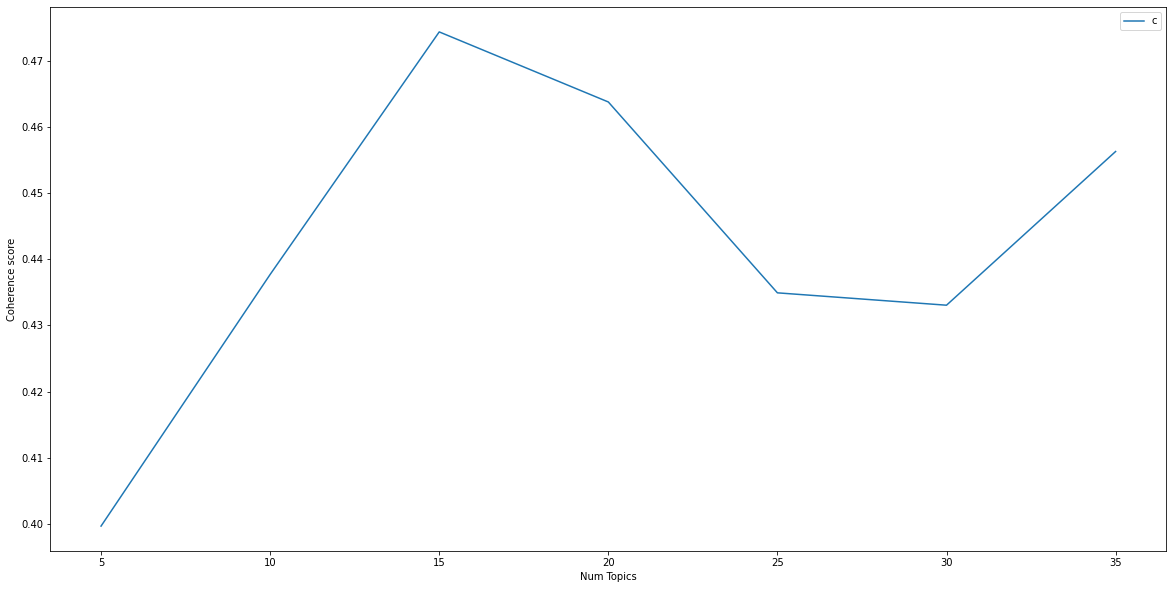

Num Topics = 5  has Coherence Value of 0.3997
Num Topics = 10  has Coherence Value of 0.4377
Num Topics = 15  has Coherence Value of 0.4744
Num Topics = 20  has Coherence Value of 0.4638
Num Topics = 25  has Coherence Value of 0.4349
Num Topics = 30  has Coherence Value of 0.433
Num Topics = 35  has Coherence Value of 0.4563


In [14]:
# Can take a long time to run.
model_list, coherence_values = lda_utils.compute_coherence_values(texts=data_processed,
                                                                  corpus=corpus, 
                                                                  dictionary=id2word,  
                                                                  start=5, 
                                                                  limit=40,  
                                                                  step=5)

In [15]:
df_topic_keywords = lda_utils.format_topics_sentences(ldamodel=lda_model, 
                                                      corpus=corpus, 
                                                      texts=data_processed)

# Format
df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.sample(3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
1877,1877,2.0,0.6665,"stock, option, call, trading, fund, year, reta...",[world]
4531,4531,0.0,0.7772,"market, today, money, time, week, tomorrow, ro...","[sink, market]"
7030,7030,0.0,0.3333,"market, today, money, time, week, tomorrow, ro...",[]


In [16]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                      grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                      axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9393,"market, today, money, time, week, tomorrow, robinhood, gme, people, moon","[currency, recycling, coin, battery, vehicle, mining, metal, name, air, land]"
1,1.0,0.9258,"share, guy, price, day, trade, buy, hold, line, loss, thing","[morning, wtf, trick, state, percent, price, share, limit]"
2,2.0,0.9346,"stock, option, call, trading, fund, year, retard, spy, hand, put","[winner, self, storage, dividend, jcap, funding, solution, trading, book, value]"


In [18]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

pyLDAvis.save_html(vis, "../output/lda-board_wallStreetBets.html")